In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

# Modified Barabasi-Albert Model

In this question we are asked to Modify the Barabasi-Albert algorithm to accentuate/strengthen the bias of rich getting richer phenomenon such that the probability of a newly added node getting connected to an existing
node is now “proportional to the square of its degree”.

So, I have implemented the function which takes order of degree as parameter so that we can obtain scale free network for any higher order variants. No external libraries has been used for creating graph in this question, everything is done from scratch

In [13]:
#https://www.geeksforgeeks.org/building-an-undirected-graph-and-finding-shortest-path-using-dictionaries-in-python/
#Below function calculates shortest path between source and destination nodes using BFS
def BFS_for_finding_Shortest_path(source, destination,shortest_paths,adjacency_list): 
    visited = [] 
    #storing source node in a queue
    queue = [[source]] 

    if source == destination: 
        shortest_paths.append(0)
        return 
    #checking while queue is not empty
    while queue: 
        visited_path = queue.pop(0) 
        vertex = visited_path[-1]  
        if vertex not in visited: 
            neighbouring_nodes = adjacency_list[vertex] 

            for neighbour in neighbouring_nodes: 
                new_visited_path = list(visited_path) 
                new_visited_path.append(neighbour) 
                queue.append(new_visited_path) 
                  
                # Condition to check if the neighbour node is the destination node 
                if neighbour == destination: 
                    shortest_paths.append(len(new_visited_path)-1)
                    return
            visited.append(vertex) 
    print("Path does not exists") 
    return 

The below function calculates average clustering coefficient of the given network. Calculating clustering coefficient of a node n = (number of edges between neighbors of the node n)/ (maximum possible edges between neighbors of node n).

In [14]:
#calculating average clustering coefficients
def Clustering_Coefficient(adjacency_list,edge_list,n):
    clustering_coeff=[]
    for i in adjacency_list:
        neighbors=adjacency_list[i]
        count=0
        n_=len(neighbors)
        max_neigh_edges=(n_*(n_-1))/2
#     print(max_neigh_edges)
        for n1 in range(len(neighbors)):
            for n2 in range(n1+1,len(neighbors)):
                if (neighbors[n1],neighbors[n2]) in edge_list or (neighbors[n2],neighbors[n1]) in edge_list:
                    count+=1
        if max_neigh_edges!=0:
            coeff=count/max_neigh_edges
            clustering_coeff.append(coeff)
    avg_cc=sum(clustering_coeff)/n
    return avg_cc


# Implementing Modified Barabasi-Albert Model

I have implemented a function which takes and value of order for creating higher order variants of the scale free networks. This function returns the average path length, average clustering coefficient , maximumn degree and average degree obtained by taking mean over 100 instances.

The following steps has been followed for each of the 100 instances:

An initial random graph has been generated with 5 nodes and 10 edges such that the graph is connected. In other words the degree of each node must be atleast 1.

A matrix is created for initial graph which is named init_graph and if nodes i and j are connected then init_graph[i][j] and init_graph[j][i] is marked as 1.

Now at each evolution step, one node and m edges(I have taken m=4) are added to the existing network till the total number of nodes reach a particular value(here value=100).

For each addition of node:

4.1 Compute the degree of all the pre exisiting nodes and calculate the probability Π(k) that a link of the new node connects to node i depends on the degree ki as Π(ki)=(ki)^order/∑j(kj)^order

<b> where (ki)^order denote the square of degree of node i if order =2, cube of degree of node i if order =3, and so on. and summation of Kj denoted the summation of squares of all the degrees of the pre exisiting nodes if order=2, summation of cubes of all the degrees of the pre exisiting nodes if order=3, and so on. </b>

4.2 Calculate the cummulative sum corresponding to each pre existing node.

4.3 Generate a random number between 0-1 and see in which range the random number belongs. For example, if the random number obtained is 0.33 and cummulative sum corresponding to each pre existing node are [0.1,0.2,0.4,0.8,1.0], then as 0.33 lies between 0.2-0.4, so connect the edge from new node to either node 2 or node 3( as 0.2 is in 2nd index and 0.4 is in 4th index)

4.4 Repeat step 4.3 till all the m edges are connected. Repeat step 4 till the total number of nodes in the network becomes 100.

After the whole network is created for one instance, its average clustering coefficient, average path length and degree distribution is returned.


In [15]:

def modified_barabasi(order):
    final_degree_list=[] #stores average degrees for all 100 instances
    final_avg_clust_coeff=[]  #stores average clustering coefficients for all 100 instances
    final_avg_path_length=[]  #stores average path length for all 100 instances
    final_max_degree=[]
    final_avg_degree=[] #stores average degree of all 100 instances
    for instance in range(100):
        nodes=5 #taking 5 nodes for creating initial network
        edges=10 #taking 10 edges for creating initial network
        e=0
        init_graph=np.zeros((nodes,nodes))
        while(e<edges):
            for i in range(nodes):
            #choosing a random node
                val=random.randint(0,nodes-1)
        #checking for self loop
                if val!=i:
                    init_graph[i][val]=1
                    init_graph[val][i]=1
                    e=e+1
        # if all the edges are taken and attached then the loop will end
                if e==edges:
                    break
        total_nodes=100 #total number of nodes considered for each instance
        new_edges=4 # number of edges that are added in each evolution stage
        while(nodes!=total_nodes): # loop for each evolution step till the network contains 200 nodes
#     print(init_graph) 
            degree_dict={}
            degrees=[]
#degree_dict contains degrees of every node
            c=0
            for i in init_graph:
#to calculate degree of each node counting the number of 1s in each row
                deg=list(i).count(1)
                degrees.append(deg)
                degree_dict[c]=deg
                c=c+1
#calculating summation of degrees of all the existing nodes
            summ=0
            sum_of_degree={}
            for dd in degree_dict:
                summ=summ+math.pow(degree_dict[dd], order)
                sum_of_degree[dd]=summ
            summation_of_deg=sum(sum_of_degree.values())
            prob_dict={}
            prob_temp=[]
# each index of prob_dict contains the probabilty=(degree of ith node)/(summation of degree of all the nodes) for each node
            for d in degree_dict:
                prob=math.pow(degree_dict[d], order)/summation_of_deg
                prob_dict[d]=prob
                prob_temp.append(prob)
            cummulative_prob=[]
#cummulative_prob contains cummulative degrees of each existing node
            s=0
            for i in range(len(prob_temp)):
                s=s+prob_temp[i]
                cummulative_prob.append(s)
#     print(cummulative_prob)
        #adding a new node
        #to Add a new node I am adding one row and one column with values 0 in the existing graph
            new_col = [0]*len(init_graph[0])
            init_graph = np.column_stack((init_graph, new_col))
            new_row = [0]*len(init_graph[0])
            init_graph = np.vstack ((init_graph, new_row))
            new_node_index=len(init_graph)-1
            count=0
#adding new edges to the network
            while(count<new_edges):
                new_index=0
                v=random.uniform(0,1)
                if v<cummulative_prob[0]:
                    new_index=0
                else:
                    for r in range(1,len(cummulative_prob)-1):
                #if random value lies between ith and (i+1)th index then edge will be added to (i+1)th node
                        if v>cummulative_prob[r] and v<cummulative_prob[r+1]:
                            new_index=r+1
#                     print(v,r+1,cummulative_prob[r+1])
                            break
                if(init_graph[new_node_index][new_index]!=1):
                    init_graph[new_node_index][new_index]=1
                    init_graph[new_index][new_node_index]=1
                    count=count+1
#             new_edges+=1
            nodes=nodes+1
        edge_list=[]
# edge list contains all the edge pairs of the final network
        for i in range(len(init_graph)):
            for j in range(len(init_graph)):
                if(init_graph[i][j]==1):
                    edge_list.append((i,j))
        adjacency_list={} #contains neighbors of each node
        it=0
        for row in init_graph:
            temp=[]
            for v in range(len(row)):
                if row[v]==1:
                    temp.append(v)
            adjacency_list[it]=temp
            it+=1
        path_length=[] #stores path length for final network
        cc1=Clustering_Coefficient(adjacency_list,edge_list,total_nodes)
#         print("average clustering coeff for instance = ",instance, " is: ", cc1)
        node_list=[]
        for a in adjacency_list:
            node_list.append(a)
        for i in range(len(node_list)):
            for j in range(i+1,len(node_list)):
                BFS_for_finding_Shortest_path(node_list[i], node_list[j],path_length,adjacency_list)
        total_edges1=(total_nodes*(total_nodes-1))/2
        pl1=sum(path_length)/total_edges1
#         print("average path length for instance" ,instance," is: ", pl1)
        final_avg_path_length.append(pl1)
        final_avg_clust_coeff.append(cc1)
    
#degree corresponding to each node
        degrees=[]
        degree_dict={}
        c=0
        for i in init_graph:
            deg=list(i).count(1) #calculating degree of a node by counting 1s in its correspnding row
            degrees.append(deg)
            degree_dict[c]=deg
            c=c+1
#         print("Average degree of the network is :",sum(degrees)/total_nodes)
        degree_distribution1={} 
        final_avg_degree.append(sum(degrees)/total_nodes)
        for degree in degrees:
            if degree not in degree_distribution1.keys():
                pro=degrees.count(degree)/total_nodes
                degree_distribution1[degree]=pro
#         print("Maximum degree is: ",max(degrees))
        final_max_degree.append(max(degrees))
#         print("Minimum degree is: ",min(degrees))
        final_degree_list.append(degree_distribution1)

    return final_degree_list,final_avg_clust_coeff,final_avg_path_length,final_avg_degree,final_max_degree

<b> Calling modified Barabasi function of different higher order variants i.e. [1,2,3,4] and prinitng their Average Clustering Coefficient, Average path length, Average degree and plotting degree distribution for each order.</b>

Average Clustering Coefficient of all 100 instances for order=,  1 is:  0.42893942009651
Average path length of all 100 instances for order=,  1 is:  1.9297757575757575
Average degree of all 100 instances for order=,  1 is:  7.7346
97


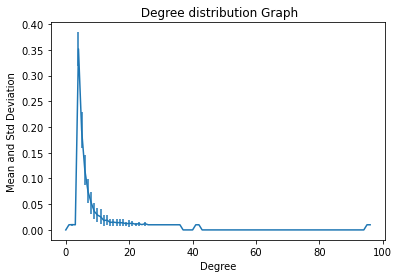

Average Clustering Coefficient of all 100 instances for order=,  2 is:  0.6720849469105019
Average path length of all 100 instances for order=,  2 is:  1.9241434343434347
Average degree of all 100 instances for order=,  2 is:  7.736200000000001
97


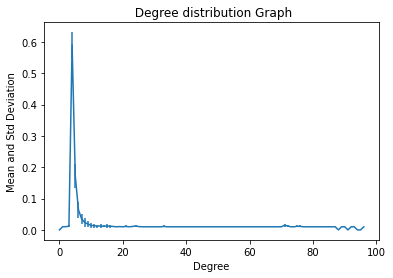

Average Clustering Coefficient of all 100 instances for order=,  3 is:  0.8418526093595182
Average path length of all 100 instances for order=,  3 is:  1.9227353535353537
Average degree of all 100 instances for order=,  3 is:  7.736600000000001
97


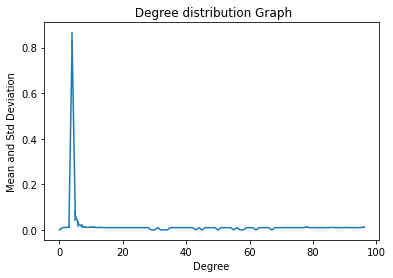

Average Clustering Coefficient of all 100 instances for order=,  4 is:  0.8657098278596621
Average path length of all 100 instances for order=,  4 is:  1.922260606060606
Average degree of all 100 instances for order=,  4 is:  7.7386
98


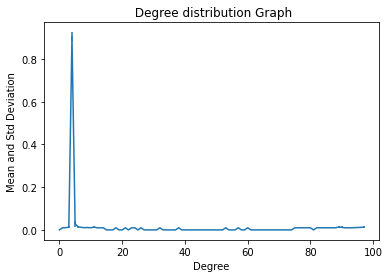

In [16]:
orders=[1,2,3,4]
for o in orders:
    avg_degree,avg_cc,avg_path,avg_deg,max_degree1=modified_barabasi(o)
    print("Average Clustering Coefficient of all 100 instances for order=, ", o,"is: ", np.mean(avg_cc))
    print("Average path length of all 100 instances for order=, ", o,"is: ", np.mean(avg_path))
    print("Average degree of all 100 instances for order=, ", o,"is: ", np.mean(avg_deg))
    max_degree= int(np.mean(max_degree1))
    print(max_degree)
    scaled_mean_degree={}
    for i in range((max_degree)):
        temp=[]
        for dict1 in avg_degree:
            if i in dict1:
                temp.append(dict1[i])
        if len(temp)!=0:
            scaled_mean_degree[i]=np.mean(temp)
        else:
            scaled_mean_degree[i]=0
    scaled_std_deviation={}
    for i in range((max_degree)):
        temp1=[]
        for dict1 in avg_degree:
            if i in dict1:
                temp1.append(dict1[i])
        if len(temp1)!=0:
            scaled_std_deviation[i]=np.std(temp1)
        else:
            scaled_std_deviation[i]=0
    x=[]
    for i in range((max_degree)):
        x.append(i)
    xval = scaled_mean_degree.values()
    yval = scaled_std_deviation.values() 
    plt.errorbar(x, scaled_mean_degree.values(), yerr = scaled_std_deviation.values() )
    
    plt.title(" Degree distribution Graph")
    plt.xlabel("Degree")
    plt.ylabel("Mean and Std Deviation")
    plt.show() 

# Comparing different topological features for different variants of scale free network

We can see from the above graphs that the graphs for higher order variants the degree distribution graph decreases very fast. This happens because in higher order variants, the rich becoming richer phenomena is increasing, i.e the more the order, the more hubs becomes hubbier with large connections and most of the nodes will have very small degree.

We observe from the table given below that the clustering coefficient increases. As new nodes are added every time, preferential attachment increases and hence the connecting between the hubs increases which increases clustering coefficient.

As rich nodes get richer, so the path length between nodes decreases due to hubs, so overall average path length is also decreasing slightly with increase in order.

We can see from the table that average degree for all the orders are coming almost same.


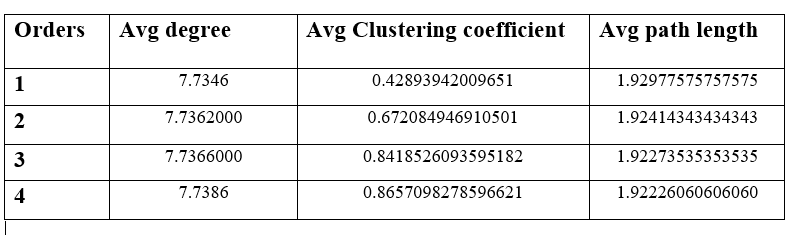

In [20]:
from IPython.display import Image
Image(filename='comparision_table.png')